In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv(r'D:\Projects\FYP prototype\ver 1.0\GPU\Mergers\base_g3d_IM.csv')
data

,chipset,core_clock,boost_clock,memory_clock,memory,memory_ver,bus_width,shaders,TMUs,ROPs,PCIe,TDP,rec_psu,detail_URL,G3Dmark,G2Dmark
0,GeForce RTX 3060,1320,1777,1875,8.0,6,128,3584,112,48,PCIe 4.0 x16,170,450 W,https://www.techpowerup.com/gpu-specs/geforce-...,16958,951
1,GeForce RTX 3060,1320,1867,1875,8.0,6,128,3584,112,48,PCIe 4.0 x16,170,450 W,https://www.techpowerup.com/gpu-specs/geforce-...,16958,951
2,Radeon RX 6600,1626,1626,1750,8.0,6,128,1792,112,64,PCIe 4.0 x8,132,300 W,https://www.techpowerup.com/gpu-specs/radeon-r...,13881,945
3,Radeon RX 6800 XT,1825,2250,2000,16.0,6,256,4608,288,128,PCIe 4.0 x16,300,700 W,https://www.techpowerup.com/gpu-specs/radeon-r...,23364,1078
4,Radeon RX 6700 XT,2321,2321,2000,12.0,6,192,2560,160,64,PCIe 4.0 x16,230,550 W,https://www.techpowerup.com/gpu-specs/radeon-r...,18993,1014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,GeForce GTX 560 SE,736,746,957,1.0,5,192,288,48,24,PCIe 2.0 x16,150,450 W,https://www.techpowerup.com/gpu-specs/geforce-...,2087,413
301,FirePro V9800,850,850,1150,4.0,5,256,1600,80,32,PCIe 2.0 x16,250,600 W,https://www.techpowerup.com/gpu-specs/firepro-...,2727,655
302,Radeon R7 260,1000,1000,1500,2.0,5,128,768,48,16,PCIe 3.0 x16,95,250 W,https://www.techpowerup.com/gpu-specs/radeon-r...,2892,559
303,FirePro S9000,900,900,1375,6.0,5,384,1792,112,32,PCIe 3.0 x16,225,550 W,https://www.techpowerup.com/gpu-specs/firepro-...,5059,561


In [109]:
#CSV file has columns 'X' and 'y' for features and target
X = data[['boost_clock', 'memory', 'memory_ver', 'bus_width', 'shaders', 'TMUs', 'ROPs', 'TDP']]
y = data[['G3Dmark', 'G2Dmark']]
#y = data['G3Dmark']

#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

In [97]:
model = SVR(gamma=0.1, epsilon=0.1)
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 43970942.00880651


In [115]:
#Create and train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 201293.33259034666


In [84]:
#Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2792118.872391051


In [112]:
#Create and train model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

ValueError: y should be a 1d array, got an array of shape (244, 2) instead.

In [113]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1401692.3462199823


In [114]:
from sklearn.linear_model import ElasticNet

# Create and train the ElasticNet regression model with regularization parameters alpha and l1_ratio
model = ElasticNet(alpha=0.01, l1_ratio=0.9)  # alpha is the overall regularization strength, l1_ratio controls the balance between L1 and L2 regularization
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1401697.8508998442


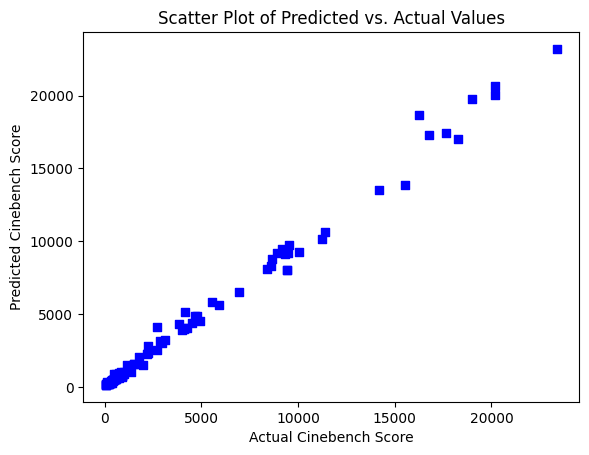

In [116]:
ax = plt.figure().add_subplot(111)

ax.scatter(y_test, y_pred, c='b', marker='s')
plt.xlabel("Actual Cinebench Score")
plt.ylabel("Predicted Cinebench Score")
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.show()

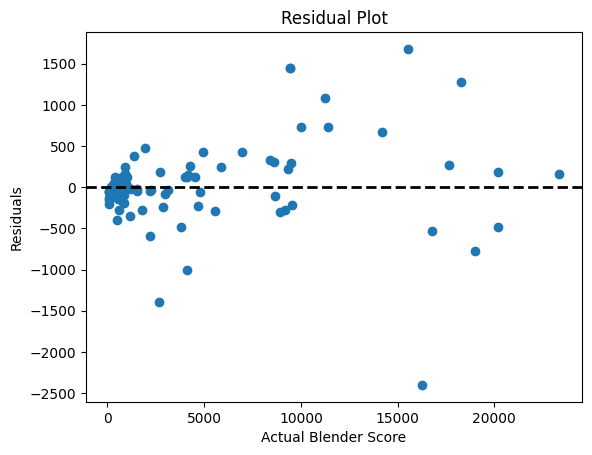

In [117]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel("Actual Blender Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

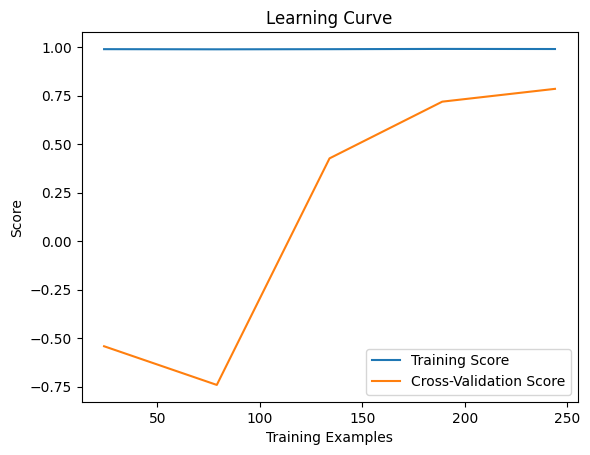

In [118]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [119]:
import pickle

def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

save_model(model, 'g3d_predictor.pkl')